In [1]:
import pandas as pd
import sys
import importlib
sys.path.append("../scripts/")
import regex_maven
import rq_aux
import re
import matplotlib.pyplot as plt 
import seaborn as sns

importlib.reload(regex_maven)
importlib.reload(rq_aux)
 #"small", "medium", "large"
sizes1 = rq_aux.sizes1

#"all", "small", "medium", "large"
sizes2 = rq_aux.sizes2 

In [2]:
regex = regex_maven
plugins = regex.plugins
categories = regex.categories
prefix = "maven_"
build_tool = "maven"
is_build_tool = "is_maven"
noerror = False
output_path = "../data/output_data/"
overview_dataset = f"{output_path}overview_daylight_witherror.csv"
alltasks_dataset = f"{output_path}all_tasks_witherror.csv"

In [3]:
rq_aux.check_categories(regex)

In [4]:
df = rq_aux.read_all_tasks(alltasks_dataset, build_tool, noerror)

Build tool maven = 135944


In [5]:
tasks = {}
for x in sizes1:
  tasks[x] = rq_aux.get_tasks_by_kind(df[df["size"] == x], plugins)

tasks['all'] = rq_aux.get_tasks_by_kind(df, plugins)

In [6]:
sum_tasks = {}
for x in sizes2:
  sum_tasks[x] = rq_aux.calc_energy_by_task(tasks[x])


In [7]:
for x in sizes2:
  print(f"**** {x.title()} ****")
  rq_aux.print_all_tasks(rq_aux.filter_tasks_by(sum_tasks[x], '', 0.02))
  print("")

**** All ****
total: Energy: 20243266.621575635 (100.0%)
surefire: Energy: 7787787.744102805 (38.5%)
archetype-update: Energy: 3204375.4461364676 (15.8%)
failsafe: Energy: 1507843.0673714953 (7.4%)
compile: Energy: 933719.8143146395 (4.6%)
install: Energy: 922646.8005067199 (4.6%)
jacoco: Energy: 812754.6699662172 (4.0%)
testcomp: Energy: 546362.5828158673 (2.7%)
javadoc: Energy: 527244.4002109991 (2.6%)
other: Energy: 419891.67810205306 (2.1%)

**** Small ****
total: Energy: 618145.3455386658 (100.0%)
surefire: Energy: 157746.30060735362 (25.5%)
javadoc: Energy: 157420.44625474006 (25.5%)
checkstyle: Energy: 39573.518747656766 (6.4%)
git-commit-id: Energy: 31874.390578375645 (5.2%)
frontend: Energy: 30960.61221441816 (5.0%)
rewrite: Energy: 30478.21224843296 (4.9%)
compile: Energy: 22809.525302626458 (3.7%)
spotless: Energy: 15536.089259884986 (2.5%)
testcomp: Energy: 13371.555779414939 (2.2%)
jar: Energy: 13241.657906727696 (2.1%)

**** Medium ****
total: Energy: 9780473.18975454 (10

In [8]:
df = pd.read_csv(overview_dataset)

# Remove Maven Workflows Without Maven Subtasks
df = rq_aux.remove_workflows_no_subtask(df[df[is_build_tool]], prefix, plugins)

df_size = rq_aux.create_dfs_size(df, is_build_tool)

Workflows No Subtask: Removed 207 workflows: 938 -> 731


In [9]:
# Calculate maven-related energy consumption for all maven projects
tasks = {}

for x in sizes2:
  print(f"*** {x.title()} ***")
  tasks[x] = rq_aux.calc_sum(df_size[x], prefix, plugins)
  rq_aux.calc_workflow_energy_proportion (df_size[x], tasks[x])
  rq_aux.calc_ratio(tasks[x])
  print(f"{df_size[x]['energy'].sum():0.2f}")  
  

*** All ***
Energy:  20243267 (24.5%)
Seconds:  1095565692628 (20.3%)
82605467.26
*** Small ***
Energy:  618145 (37.3%)
Seconds:  35638455380 (35.3%)
1655321.52
*** Medium ***
Energy:  9780473 (37.6%)
Seconds:  459737496565 (31.0%)
25997316.12
*** Large ***
Energy:  9844648 (17.9%)
Seconds:  600189740683 (15.7%)
54952829.62


/home/rlefeuvr/Documents/Workspace/ICT4S_2025/energy-CI-CD/analysis/../scripts/rq_aux.py:46: RuntimeWarning: invalid value encountered in scalar divide
  return round(100 * x / y, n)


In [10]:
for x in sizes2:
  print(f"**** {x.title()} ****")
  rq_aux.print_tasks_summary(rq_aux.filter_tasks_by(tasks[x], 'energy', 0.02))
  print("")

**** All ****
*** Total ***
N:  100.0%;  Energy:  100.0%;  Seconds:  100.0%;  Rat_P:  nan%;  Rat_N:  100.0%;  
*** Maven_Surefire ***
N:  6.1%;  Energy:  38.5%;  Seconds:  43.8%;  Rat_P:  nan%;  Rat_N:  630.3%;  
*** Maven_Archetype-Update ***
N:  0.1%;  Energy:  15.8%;  Seconds:  9.5%;  Rat_P:  nan%;  Rat_N:  29887.5%;  
*** Maven_Failsafe ***
N:  0.4%;  Energy:  7.4%;  Seconds:  10.3%;  Rat_P:  nan%;  Rat_N:  1954.8%;  
*** Maven_Compile ***
N:  15.0%;  Energy:  4.6%;  Seconds:  3.3%;  Rat_P:  nan%;  Rat_N:  30.8%;  
*** Maven_Install ***
N:  4.7%;  Energy:  4.6%;  Seconds:  5.1%;  Rat_P:  nan%;  Rat_N:  96.8%;  
*** Maven_Jacoco ***
N:  3.0%;  Energy:  4.0%;  Seconds:  3.3%;  Rat_P:  nan%;  Rat_N:  134.2%;  
*** Maven_Testcomp ***
N:  10.4%;  Energy:  2.7%;  Seconds:  1.7%;  Rat_P:  nan%;  Rat_N:  26.0%;  
*** Maven_Javadoc ***
N:  2.5%;  Energy:  2.6%;  Seconds:  2.6%;  Rat_P:  nan%;  Rat_N:  105.3%;  
*** Maven_Other ***
N:  4.7%;  Energy:  2.1%;  Seconds:  2.6%;  Rat_P:  nan%;  R

In [11]:
energy_category = {}

for x in sizes2:
  energy_category[x] = rq_aux.calc_energy_category(categories, plugins, 'energy', tasks[x], prefix)

print(energy_category['all'])
print(sum(energy_category['all'].values()))
print(tasks['all']["total"]["energy"], tasks['all'][prefix + "other"]["energy"])

{'Integration Test': np.float64(1509835.2357659503), 'Unit Test': np.float64(8140048.749245136), 'Compile': np.float64(1673435.007056701), 'Documentation': np.float64(658588.4172758933), 'Install': np.float64(4127022.246643188), 'Linter': np.float64(1534887.7922470886), 'Packaging': np.float64(812974.3945034377), 'Others': np.float64(1366583.100736189), 'Unclassified': np.float64(419891.6781020521)}
20243266.621575635
20243266.621575646 419891.6781020521


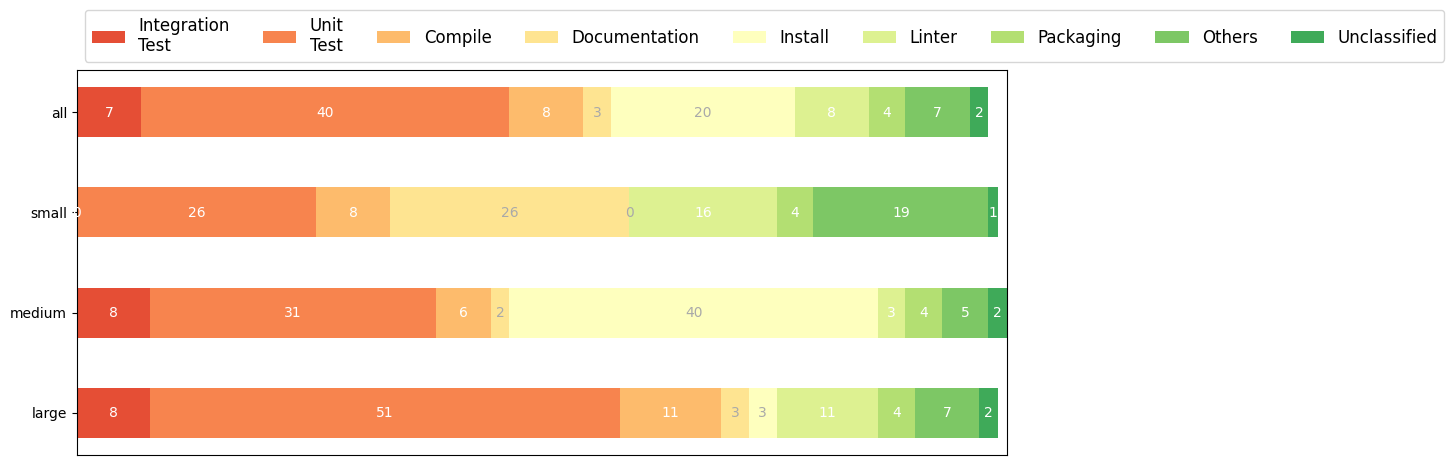

In [12]:
cat_ratios = {}
for key, value in energy_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in energy_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()


In [13]:
n_category = {}

for x in sizes2:
  n_category[x] = rq_aux.calc_energy_category(categories, plugins, 'n', tasks[x], prefix)

print(n_category['all'])
print(sum(n_category['all'].values()))
print(tasks['all']["total"]["n"], tasks['all'][prefix + "other"]["n"])

{'Integration Test': np.int64(589), 'Unit Test': np.int64(8403), 'Compile': np.int64(37027), 'Documentation': np.int64(4596), 'Install': np.int64(6472), 'Linter': np.int64(18083), 'Packaging': np.int64(22892), 'Others': np.int64(31488), 'Unclassified': np.int64(6394)}
135944
135944 6394


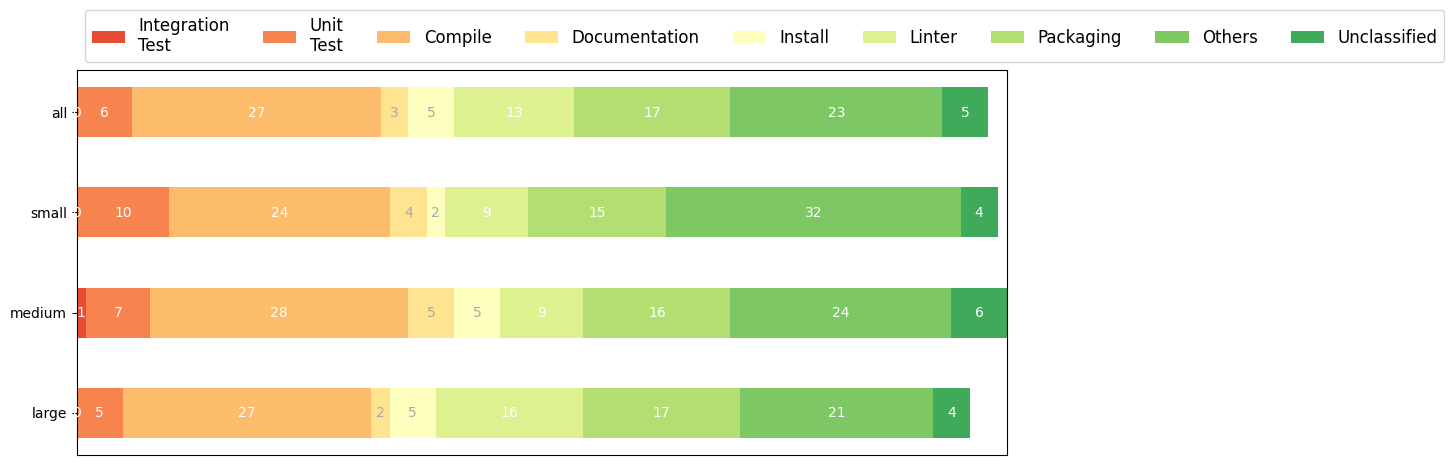

In [14]:
cat_ratios = {}
for key, value in n_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in n_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()

In [15]:
time_category = {}

for x in sizes2:
  time_category[x] = rq_aux.calc_energy_category(categories, plugins, 'seconds', tasks[x], prefix)

print(time_category['all'])
print(sum(time_category['all'].values()))
print(tasks['all']["total"]["seconds"], tasks['all'][prefix + "other"]["seconds"])

{'Integration Test': np.int64(112896072768), 'Unit Test': np.int64(502525947393), 'Compile': np.int64(62113470067), 'Documentation': np.int64(41871810230), 'Install': np.int64(160025949415), 'Linter': np.int64(78590991979), 'Packaging': np.int64(40481580531), 'Others': np.int64(69023787885), 'Unclassified': np.int64(28036082360)}
1095565692628
1095565692628 28036082360


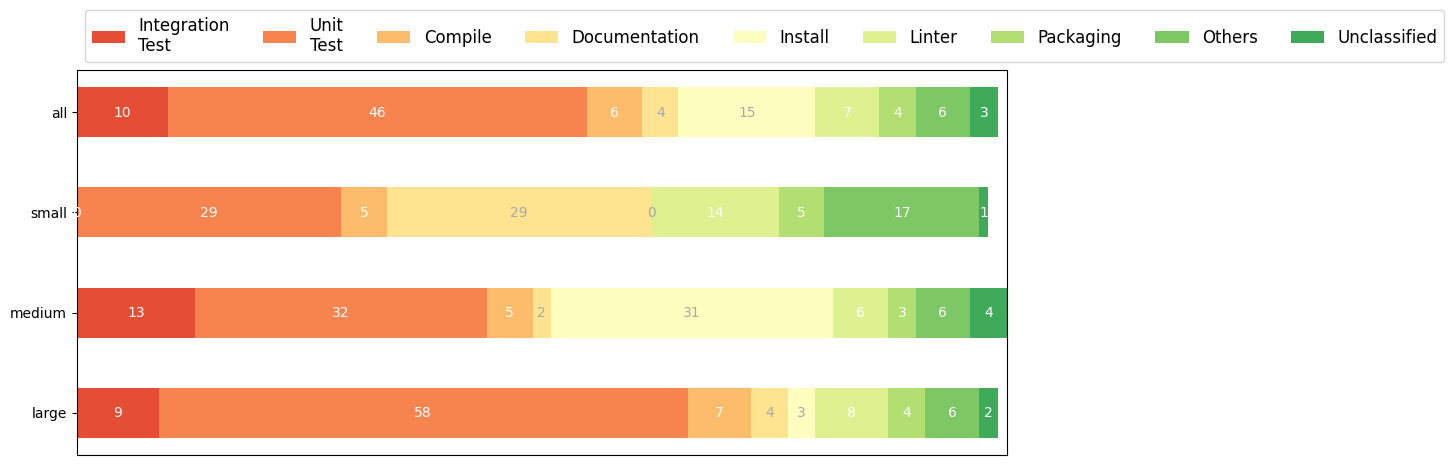

In [16]:
cat_ratios = {}
for key, value in time_category.items():
    cat_ratios[key] = rq_aux.get_ratio_categories(value)
    
    
results = { }
for x in sizes2:
    results[x] = cat_ratios[x]
    

category_names = []
for key, value in time_category['all'].items():
    category_names.append(key) 

labels = [re.sub(' ', '\n', x) for x in category_names]
rq_aux.survey(results, labels)
plt.show()